## Demo of IRIS IntegratedMLvia Python on JDBC into a IRIS 2020.3 container.

In [1]:
import jaydebeapi
import time

### 1. Get an ODBC connection 
import jaydebeapi
url = "jdbc:IRIS://irisimlsvr:51773/USER"  #We can use Docker mahine's port: url = "jdbc:IRIS://172.17.0.1:8091/USER"
driver = 'com.intersystems.jdbc.IRISDriver'
user = "SUPERUSER"  
password = "SYS"
jarfile = "./intersystems-jdbc-3.1.0.jar"

### 2. Get a cursor; start the timer
conn = jaydebeapi.connect(driver, url, [user, password], jarfile)
cursor = conn.cursor()
start= time.clock()

### 3. specify the training data, and give a model name
dataTable = 'DataMining.IrisDataset'
dataTablePredict = 'Result12'
dataColumn =  'Species'
dataColumnPredict = "PredictedSpecies"
modelName = "Flower12" #chose a name - must be unique in server end

### 4. Train and predict
cursor.execute("CREATE MODEL %s PREDICTING (%s)  FROM %s" % (modelName, dataColumn, dataTable))
cursor.execute("TRAIN MODEL %s FROM %s" % (modelName, dataTable))
cursor.execute("Create Table %s (%s VARCHAR(100), %s VARCHAR(100))" % (dataTablePredict, dataColumnPredict, dataColumn))
cursor.execute("INSERT INTO %s  SELECT TOP 20 PREDICT(%s) AS %s, %s FROM %s" % (dataTablePredict, modelName, dataColumnPredict, dataColumn, dataTable)) 
#cnxn.commit()

### 5. show the predict result
cursor.execute("SELECT * from %s" % dataTable)
rowD = cursor.fetchone() 
while rowD: 
    print(rowD) 
    rowD = cursor.fetchone()


### 5. show the predict result
cursor.execute("SELECT * from %s" % dataTablePredict)
rowR = cursor.fetchone() 
while rowR: 
    print(rowR) 
    rowR = cursor.fetchone()


### 6. CLose and clean     
#conn.close()
end= time.clock()
print ("Total elapsed time: ")
print (end-start)


(1, 1.4, 0.2, 5.1, 3.5, 'Iris-setosa')
(2, 1.4, 0.2, 4.9, 3.0, 'Iris-setosa')
(3, 1.3, 0.2, 4.7, 3.2, 'Iris-setosa')
(4, 1.5, 0.2, 4.6, 3.1, 'Iris-setosa')
(5, 1.4, 0.2, 5.0, 3.6, 'Iris-setosa')
(6, 1.7, 0.4, 5.4, 3.9, 'Iris-setosa')
(7, 1.4, 0.3, 4.6, 3.4, 'Iris-setosa')
(8, 1.5, 0.2, 5.0, 3.4, 'Iris-setosa')
(9, 1.4, 0.2, 4.4, 2.9, 'Iris-setosa')
(10, 1.5, 0.1, 4.9, 3.1, 'Iris-setosa')
(11, 1.5, 0.2, 5.4, 3.7, 'Iris-setosa')
(12, 1.6, 0.2, 4.8, 3.4, 'Iris-setosa')
(13, 1.4, 0.1, 4.8, 3.0, 'Iris-setosa')
(14, 1.1, 0.1, 4.3, 3.0, 'Iris-setosa')
(15, 1.2, 0.2, 5.8, 4.0, 'Iris-setosa')
(16, 1.5, 0.4, 5.7, 4.4, 'Iris-setosa')
(17, 1.3, 0.4, 5.4, 3.9, 'Iris-setosa')
(18, 1.4, 0.3, 5.1, 3.5, 'Iris-setosa')
(38, 1.5, 0.1, 4.9, 3.1, 'Iris-setosa')
(39, 1.3, 0.2, 4.4, 3.0, 'Iris-setosa')
(40, 1.5, 0.2, 5.1, 3.4, 'Iris-setosa')
(41, 1.3, 0.3, 5.0, 3.5, 'Iris-setosa')
(42, 1.3, 0.3, 4.5, 2.3, 'Iris-setosa')
(43, 1.3, 0.2, 4.4, 3.2, 'Iris-setosa')
(44, 1.6, 0.6, 5.0, 3.5, 'Iris-setosa')
(45, 1.9,

## Demo of initial data analysis and feature enginerring

In [33]:
import pandas as pd
sqlData = "SELECT * from DataMining.IrisDataset"
print(sqlData)
df= pd.io.sql.read_sql(sqlData, conn)
print(df.head(5))


SELECT * from DataMining.IrisDataset
   ID  PetalLength  PetalWidth  SepalLength  SepalWidth      Species
0  38          1.5         0.1          4.9         3.1  Iris-setosa
1  39          1.3         0.2          4.4         3.0  Iris-setosa
2  40          1.5         0.2          5.1         3.4  Iris-setosa
3  41          1.3         0.3          5.0         3.5  Iris-setosa
4  42          1.3         0.3          4.5         2.3  Iris-setosa


In [34]:
#drop ID columns
df = df.drop('ID', 1)
print(df.head(5))

   PetalLength  PetalWidth  SepalLength  SepalWidth      Species
0          1.5         0.1          4.9         3.1  Iris-setosa
1          1.3         0.2          4.4         3.0  Iris-setosa
2          1.5         0.2          5.1         3.4  Iris-setosa
3          1.3         0.3          5.0         3.5  Iris-setosa
4          1.3         0.3          4.5         2.3  Iris-setosa


In [35]:
# set the lables to 0, 1, 2, for NumPy matrix
df.replace('Iris-setosa', 0, inplace=True)
df.replace('Iris-versicolor', 1, inplace=True)
df.replace('Iris-virginica', 2, inplace=True)
print(df)

     PetalLength  PetalWidth  SepalLength  SepalWidth  Species
0            1.5         0.1          4.9         3.1        0
1            1.3         0.2          4.4         3.0        0
2            1.5         0.2          5.1         3.4        0
3            1.3         0.3          5.0         3.5        0
4            1.3         0.3          4.5         2.3        0
..           ...         ...          ...         ...      ...
145          5.2         2.3          6.7         3.0        2
146          5.0         1.9          6.3         2.5        2
147          5.2         2.0          6.5         3.0        2
148          5.4         2.3          6.2         3.4        2
149          5.1         1.8          5.9         3.0        2

[150 rows x 5 columns]


In [36]:
print(df.shape)

df.describe()

dataN = df.to_numpy()

print(dataN)


(150, 5)
[[1.5 0.1 4.9 3.1 0. ]
 [1.3 0.2 4.4 3.  0. ]
 [1.5 0.2 5.1 3.4 0. ]
 [1.3 0.3 5.  3.5 0. ]
 [1.3 0.3 4.5 2.3 0. ]
 [1.3 0.2 4.4 3.2 0. ]
 [1.6 0.6 5.  3.5 0. ]
 [1.9 0.4 5.1 3.8 0. ]
 [1.4 0.3 4.8 3.  0. ]
 [1.6 0.2 5.1 3.8 0. ]
 [1.4 0.2 4.6 3.2 0. ]
 [1.5 0.2 5.3 3.7 0. ]
 [1.4 0.2 5.  3.3 0. ]
 [1.4 0.2 5.1 3.5 0. ]
 [1.4 0.2 4.9 3.  0. ]
 [1.3 0.2 4.7 3.2 0. ]
 [1.5 0.2 4.6 3.1 0. ]
 [1.4 0.2 5.  3.6 0. ]
 [1.7 0.4 5.4 3.9 0. ]
 [1.4 0.3 4.6 3.4 0. ]
 [1.5 0.2 5.  3.4 0. ]
 [1.4 0.2 4.4 2.9 0. ]
 [1.5 0.1 4.9 3.1 0. ]
 [1.5 0.2 5.4 3.7 0. ]
 [1.6 0.2 4.8 3.4 0. ]
 [1.4 0.1 4.8 3.  0. ]
 [1.1 0.1 4.3 3.  0. ]
 [1.2 0.2 5.8 4.  0. ]
 [1.5 0.4 5.7 4.4 0. ]
 [1.3 0.4 5.4 3.9 0. ]
 [1.4 0.3 5.1 3.5 0. ]
 [4.7 1.6 6.3 3.3 1. ]
 [3.3 1.  4.9 2.4 1. ]
 [4.6 1.3 6.6 2.9 1. ]
 [3.9 1.4 5.2 2.7 1. ]
 [3.5 1.  5.  2.  1. ]
 [4.2 1.5 5.9 3.  1. ]
 [4.  1.  6.  2.2 1. ]
 [4.7 1.4 6.1 2.9 1. ]
 [3.6 1.3 5.6 2.9 1. ]
 [4.4 1.4 6.7 3.1 1. ]
 [4.5 1.5 5.6 3.  1. ]
 [4.1 1.  5.8 2.7 1. ]
 [

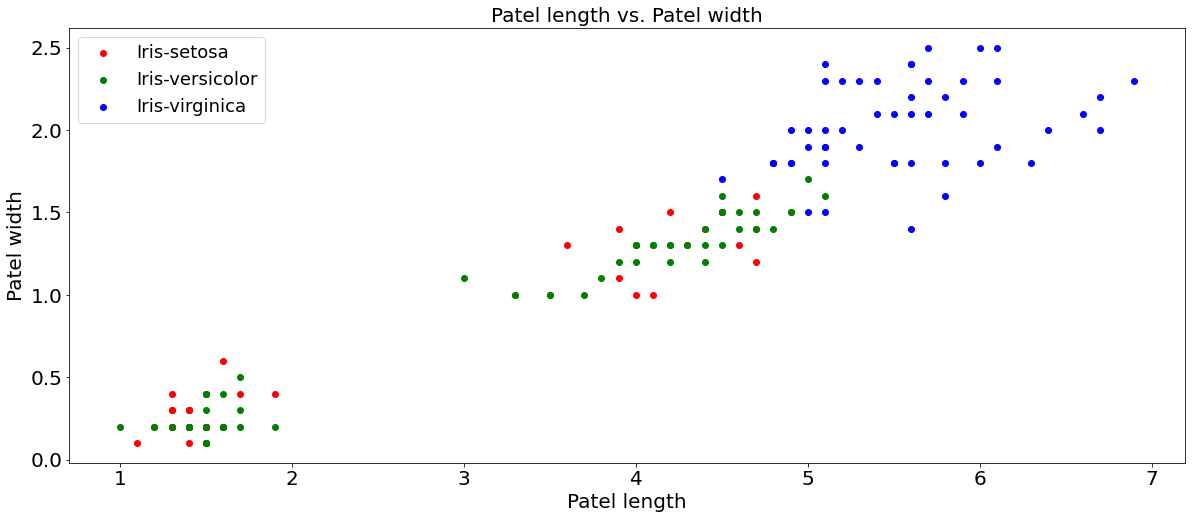

In [37]:
# Analyse and visualise the dataN 
import matplotlib.pyplot as plt
plt.figure(4, figsize=(20, 8))
plt.scatter(dataN[:50, 0], dataN[:50, 1], c='r', label='Iris-setosa')
plt.scatter(dataN[50:100, 0], dataN[50:100, 1], c='g',label='Iris-versicolor')
plt.scatter(dataN[100:, 0], dataN[100:, 1], c='b',label='Iris-virginica')
plt.xlabel('Patel length',fontsize=20)
plt.ylabel('Patel width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Patel length vs. Patel width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

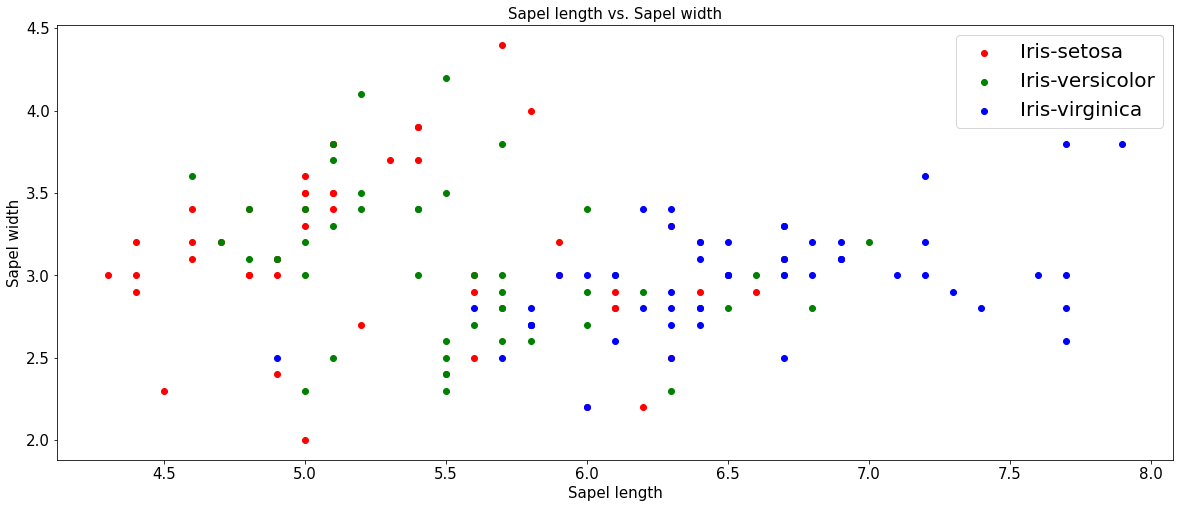

In [38]:
plt.figure(4, figsize=(20, 8))

plt.scatter(dataN[:50, 2], dataN[:50, 3], c='r', label='Iris-setosa')

plt.scatter(dataN[50:100, 2], dataN[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(dataN[100:, 2], dataN[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Sapel length',fontsize=15)
plt.ylabel('Sapel width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sapel length vs. Sapel width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


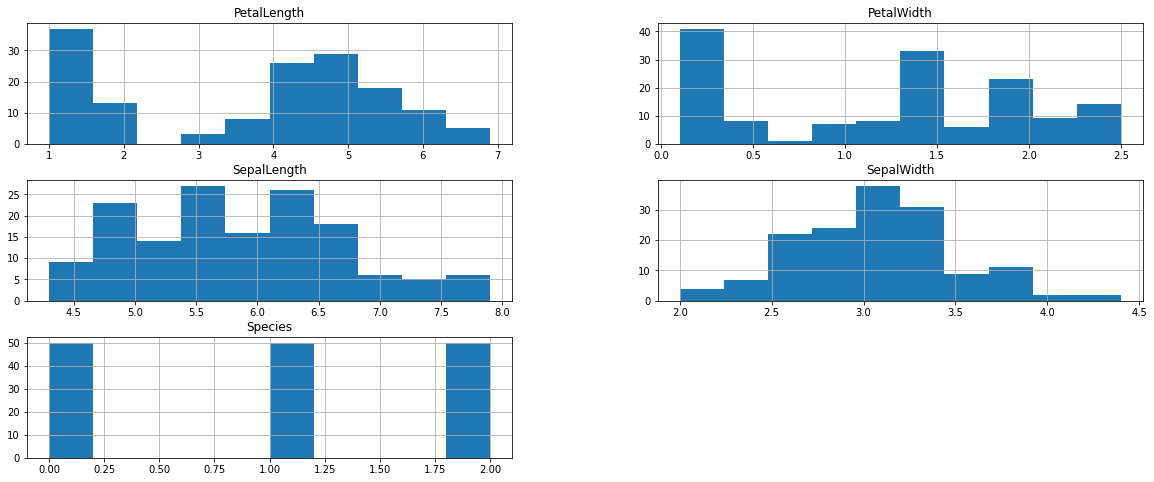

In [39]:
#histogram
fig = plt.figure(figsize = (20,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [40]:
# generate classification report
from sklearn.metrics import classification_report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Demo of the traitional Data Scietist work flow

Topics: Flowers classification
Data:   CSV files, or a table with fixed records of data. Labled for supervised learning
    Data Evaluation:Label
    Data Processing and Normalisation
Models: 
    Linear Regression, Logistic RegressionDecision trees, Naive Bayes, Random forest, Support vector machine, K-nearest neighbor, K-means clustering etc
Pipeline:
Result Evalutation:
    


In [11]:
#So, WHAT Iris (not IRIS) look like? :)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543279550/flower_zbhqb3.png")

In [12]:
### https://www.datacamp.com/community/tutorials/introduction-machine-learning-python
### Load the data and labels seperately
from sklearn.datasets import load_iris
data = load_iris().data
print(data.shape)
labels = load_iris().target
print(labels.shape)
print(labels)
print(data)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2

In [13]:
### Make it into a full dataset containing both data and labels
import numpy as np
labels = np.reshape(labels,(150,1))
data = np.concatenate([data,labels],axis=-1)
print(data.shape)
print(data)


(150, 5)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [

In [14]:
### use Pandas for data inspection, anlysis, evaluation, visualisation, pre-processing and data normalisation 
# inspect the data
import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)
dataset.head(5)


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# distribution of data classes
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [16]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


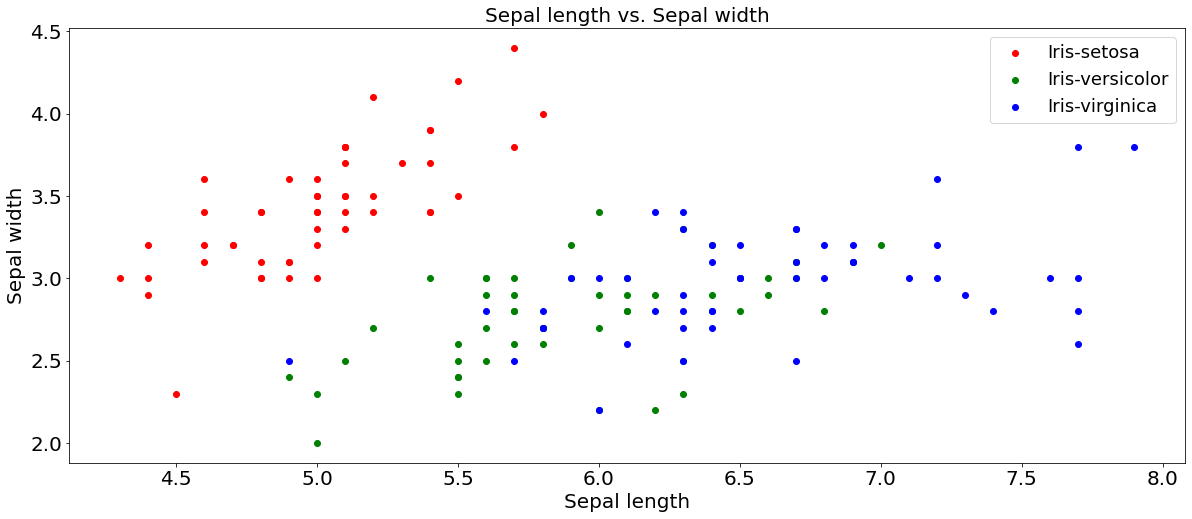

In [17]:
# Analyse and visualise the data
import matplotlib.pyplot as plt
plt.figure(4, figsize=(20, 8))
plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')
plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')
plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

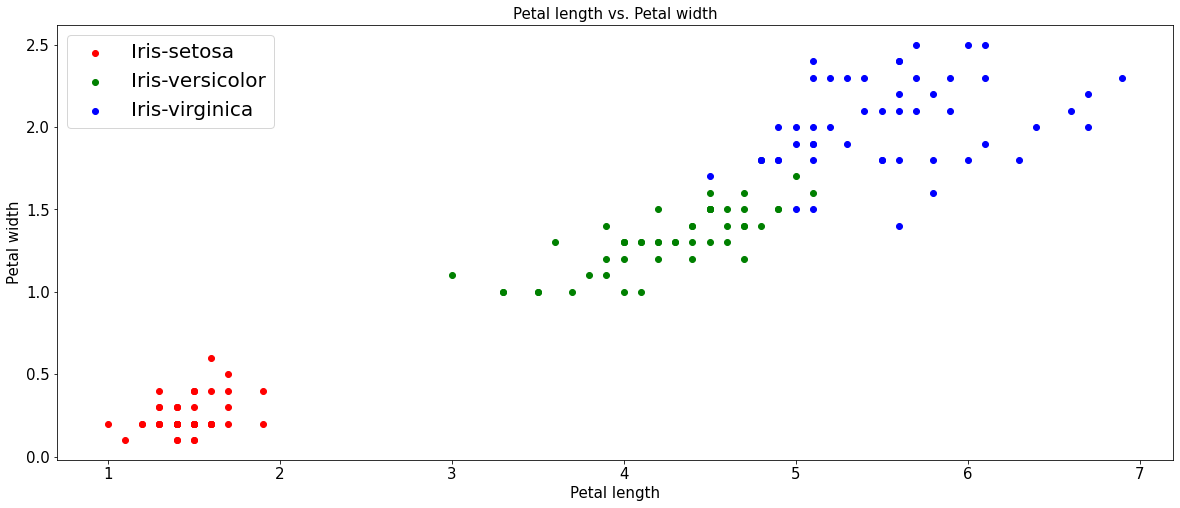

In [18]:
plt.figure(4, figsize=(20, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [19]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


In [20]:
dataset.iloc[:50,:].corr() #setosa

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [21]:
dataset.iloc[50:100,:].corr() #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


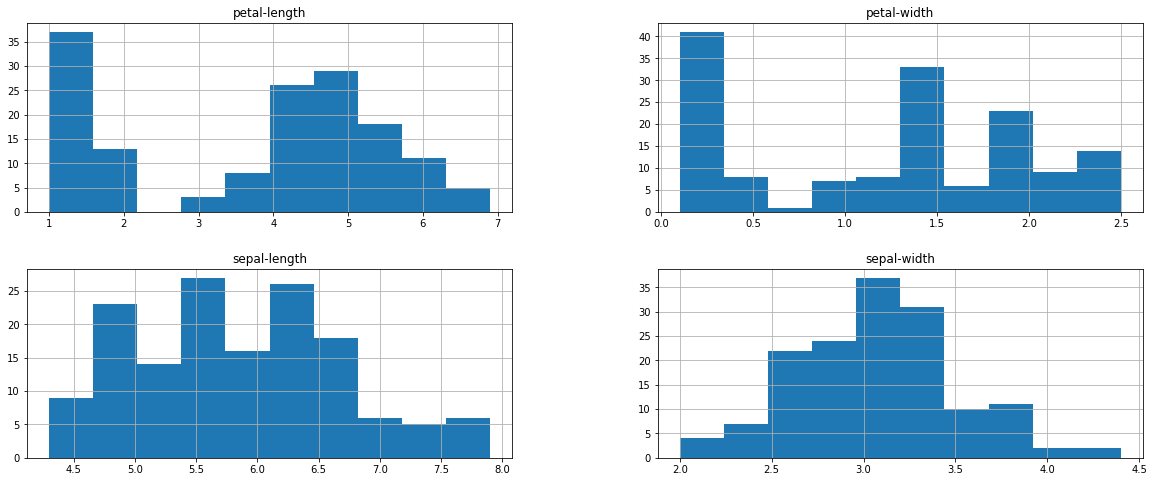

In [22]:
#histogram
fig = plt.figure(figsize = (20,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

In [23]:
### Now split the dataset into 80% training and 20% validation, radomly
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)
print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)



(120, 3) (120,) (30, 3) (30,)


In [24]:
### Slect the model KNN, then do a grid search for the best results per k
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

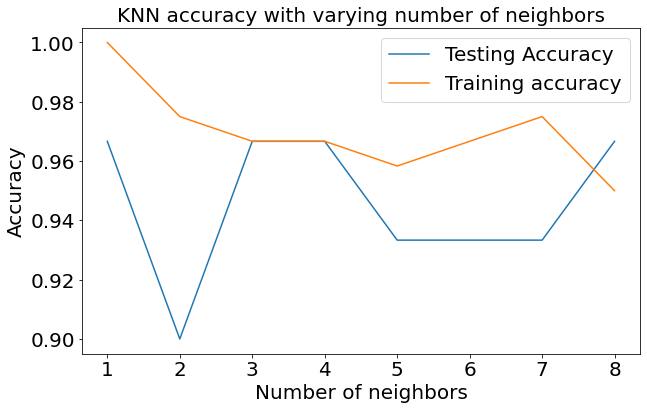

In [25]:
## Plot the result: Train and Validation accuracy vs k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [26]:
#re-train with k=3 
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)
print(test_accuracy)

0.9666666666666667


In [27]:
print(test_data)

print(test_label)

     sepal-length  sepal-width  petal-length
73            6.1          2.8           4.7
18            5.7          3.8           1.7
118           7.7          2.6           6.9
78            6.0          2.9           4.5
76            6.8          2.8           4.8
31            5.4          3.4           1.5
64            5.6          2.9           3.6
141           6.9          3.1           5.1
68            6.2          2.2           4.5
82            5.8          2.7           3.9
110           6.5          3.2           5.1
12            4.8          3.0           1.4
36            5.5          3.5           1.3
9             4.9          3.1           1.5
19            5.1          3.8           1.5
56            6.3          3.3           4.7
104           6.5          3.0           5.8
69            5.6          2.5           3.9
55            5.7          2.8           4.5
132           6.4          2.8           5.6
29            4.7          3.2           1.6
127       

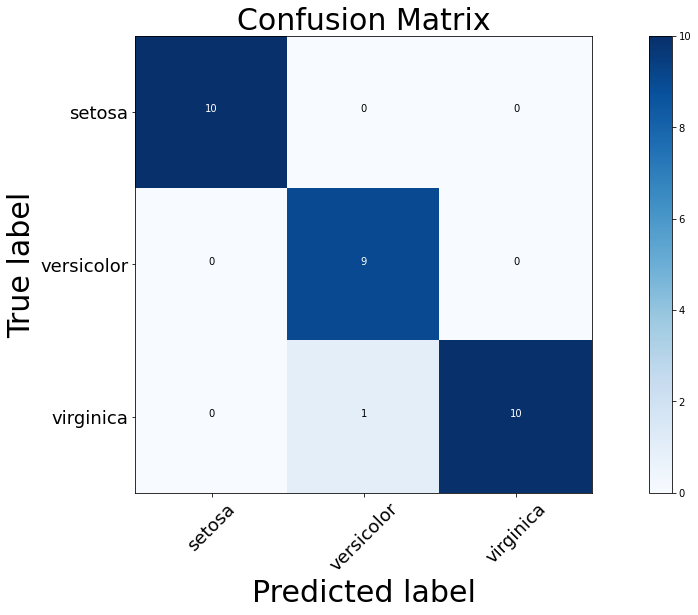

In [28]:
# Evaluate confusion matrix 
prediction = knn.predict(test_data)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names

from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(16,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [29]:
# generate classification report
from sklearn.metrics import classification_report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [30]:
print(test_label)

print(prediction)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: species, dtype: object
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginic